In [1]:
import sys
import time
from importlib import reload  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import configparser

sys.path.append('/home/fabio/Desktop/poe_price')
from poe_price.learn.feature import features
from poe_price.data import select

from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.pipeline import Pipeline, FeatureUnion

pd.set_option('display.max_columns', None)

In [31]:
reload(features)
reload(select)

<module 'poe_price.data.select' from '/home/fabio/Desktop/poe_price/src/poe_price/data/select.py'>

In [3]:
conn_config = configparser.ConfigParser()
conn_config.read('/home/fabio/Desktop/poe_price/data/database/connect.ini')

['/home/fabio/Desktop/poe_price/data/database/connect.ini']

In [4]:
data = select.get_weapons(conn_config['postgresql'], ['chaos', 'exalted'])
currency = select.get_currency(conn_config['postgresql'])

# Features pipeline

In [38]:
feat_gen = FeatureUnion([
    ('pipeline0', Pipeline([('IsAbyssJewel', features2.IsAbyssJewel())])),
    ('pipeline1', Pipeline([('IsSynthesised', features2.IsSynthesised())])),
    ('pipeline2', Pipeline([('IsCorrupted', features2.IsCorrupted())])),
    ('pipeline3', Pipeline([('IsDuplicated', features2.IsDuplicated())])),
    ('pipeline4', Pipeline([('IsIdentified', features2.IsIdentified())])),
    ('pipeline5', Pipeline([('IsVeiled', features2.IsVeiled())])),
    ('pipeline6', Pipeline([('NumPrefixes', features2.NumPrefixes()), ('MaxAbsScaler', MaxAbsScaler())])),
    ('pipeline7', Pipeline([('NumSuffixes', features2.NumSuffixes()), ('MaxAbsScaler', MaxAbsScaler())])),
    ('pipeline8', Pipeline([('NumVeiledMods', features2.NumVeiledMods()), ('MaxAbsScaler', MaxAbsScaler())])),
    ('pipeline9', Pipeline([('Category', features2.Category()), ('OneHotEncoder', OneHotEncoder(drop='first'))])),
    ('pipeline10', Pipeline([('SubCategories', features2.SubCategories()), ('OneHotEncoder', OneHotEncoder(drop='first'))])),
    ('pipeline11', Pipeline([('Ilvl', features2.Ilvl()), ('MaxAbsScaler', MaxAbsScaler())])),
    ('pipeline12', Pipeline([('SocketsCount', features2.SocketsCount()), ('MaxAbsScaler', MaxAbsScaler())])),
    ('pipeline13', Pipeline([('SocketsMaxGroupCount', features2.SocketsMaxGroupCount()), ('MaxAbsScaler', MaxAbsScaler())])),
    ('pipeline14', Pipeline([('SocketColour', features2.SocketColour()), ('MaxAbsScaler', MaxAbsScaler())])),
    ('pipeline15', Pipeline([('Requirements', features2.Requirements()), ('MaxAbsScaler', MaxAbsScaler())])),
    ('pipeline16', Pipeline([('Influences', features2.Influences())])),
    ('pipeline17', Pipeline([('Rarity', features2.Rarity()), ('OneHotEncoder', OneHotEncoder(drop='first'))])),
    ('pipeline18', Pipeline([('Modifiers', features2.Modifiers()), ('MaxAbsScaler', MaxAbsScaler())])),
    ('pipeline19', Pipeline([('Properties', features2.Properties()), ('MaxAbsScaler', MaxAbsScaler())]))
], n_jobs=3)
feat_gen.fit(data)

FeatureUnion(n_jobs=3,
             transformer_list=[('pipeline0',
                                Pipeline(memory=None,
                                         steps=[('IsAbyssJewel',
                                                 IsAbyssJewel())],
                                         verbose=False)),
                               ('pipeline1',
                                Pipeline(memory=None,
                                         steps=[('IsSynthesised',
                                                 IsSynthesised())],
                                         verbose=False)),
                               ('pipeline2',
                                Pipeline(memory=None,
                                         steps=[('IsCorrupted', IsCorrupted())],
                                         verbose=False)),
                               ('pipeline3',
                                Pipeline(memory=None,
                                         steps=...
         

In [39]:
feat_gen.transform(data)

<1000x350 sparse matrix of type '<class 'numpy.float64'>'
	with 22300 stored elements in Compressed Sparse Row format>

In [ ]:
y_feat_gen = Pipeline([
    ('Price', features.Price(market_head=10, outlier_window=3)), 
    ('MaxAbsScaler', MaxAbsScaler())])

y_feat_gen.fit((data, currencies))

In [ ]:
y = y_feat_gen.transform((data, currencies))

# Price analysis

In [30]:
price_transformer = feature.Price()

y = price_transformer.fit_transform(items, currency)

In [5]:
price_transformer.c_rates

,chisel,regal,chance,alt,alch,fuse,divine,chrom,exalted,regret,chaos,mirror,scour,blessed,gcp
chisel,1,0.883,0.096,0.188,0.173,NaN,NaN,NaN,229.286,1.013,1.183,NaN,0.54,NaN,0.55
regal,0.394,1,NaN,0.143,NaN,NaN,NaN,NaN,197.2,0.553,1.396,NaN,0.299,NaN,NaN
chance,2.25,NaN,1,1.062,1.782,NaN,NaN,NaN,522.5,3.497,8.254,NaN,NaN,NaN,NaN
alt,1.667,0.958,0.336,1,1.003,NaN,41.5,NaN,543.2,2.765,3.69,NaN,1.202,NaN,3.286
alch,1.027,NaN,0.096,0.26,1,NaN,NaN,NaN,346.5,1.144,2.254,NaN,0.788,NaN,2.403
fuse,1.013,1.375,0.223,0.455,0.729,1,38.5,NaN,454.775,2.05,3.298,NaN,1.084,NaN,2.488
divine,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,8.259,NaN,0.065,NaN,NaN,NaN,NaN
chrom,3.125,2.015,0.458,1.124,1.275,NaN,98,1,904.059,3.75,6.514,NaN,2.532,NaN,5
exalted,0.004,0.004,NaN,0.001,0.002,NaN,0.1,NaN,1,0.006,0.007,NaN,0.003,NaN,0.01
regret,0.2,0.25,0.046,0.15,0.196,NaN,11,NaN,138.667,1,0.831,NaN,0.321,NaN,0.688


In [6]:
price_transformer.c_rates * price_transformer.c_rates.T

,chisel,regal,chance,alt,alch,fuse,divine,chrom,exalted,regret,chaos,mirror,scour,blessed,gcp
chisel,1,0.347902,0.216,0.313396,0.177671,NaN,NaN,NaN,0.917144,0.2026,0.740558,NaN,0.27,NaN,0.1111
regal,0.347902,1,NaN,0.136994,NaN,NaN,NaN,NaN,0.7888,0.13825,0.730108,NaN,0.269698,NaN,NaN
chance,0.216,NaN,1,0.356832,0.171072,NaN,NaN,NaN,NaN,0.160862,0.874924,NaN,NaN,NaN,NaN
alt,0.313396,0.136994,0.356832,1,0.26078,NaN,NaN,NaN,0.5432,0.41475,0.56088,NaN,0.181502,NaN,0.256308
alch,0.177671,NaN,0.171072,0.26078,1,NaN,NaN,NaN,0.693,0.224224,0.671692,NaN,NaN,NaN,NaN
fuse,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.9894,NaN,NaN,NaN,NaN
divine,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0.8259,NaN,0.95745,NaN,NaN,NaN,NaN
chrom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.827278,NaN,NaN,NaN,NaN
exalted,0.917144,0.7888,NaN,0.5432,0.693,NaN,0.8259,NaN,1,0.832002,1.03872,NaN,0.826608,NaN,0.85353
regret,0.2026,0.13825,0.160862,0.41475,0.224224,NaN,NaN,NaN,0.832002,1,0.749562,NaN,0.138993,NaN,0.344


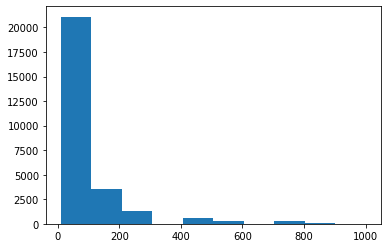

In [7]:
plt.figure()

plt.hist(y[(y > 10) & (y < 1000)])

plt.show()

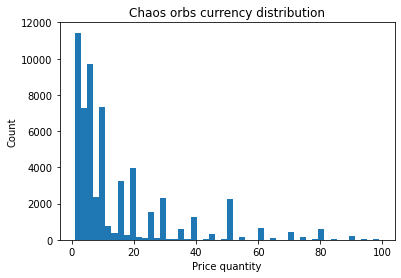

In [8]:
v = items['items'][items['items'].price_currency == 'chaos'].price_quantity
plt.figure()
plt.title('Chaos orbs currency distribution')
plt.xlabel('Price quantity')
plt.ylabel('Count')
plt.hist(v[v<100], 50)
plt.show()

In [9]:
v2 = pd.qcut(v, 20, duplicates='drop')

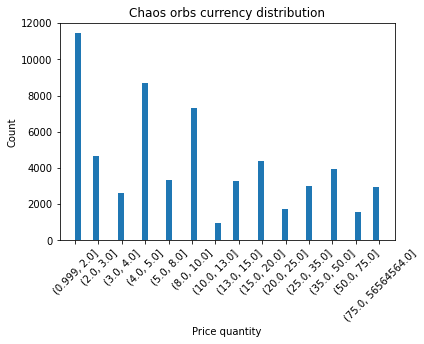

In [10]:
plt.figure()
plt.title('Chaos orbs currency distribution')
plt.xlabel('Price quantity')
plt.ylabel('Count')
plt.hist(v2.cat.codes, 50)
plt.xticks(range(len(v2.cat.categories.values)), rotation=45, labels = v2.cat.categories.values)
plt.show()